In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import os 

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv(os.getcwd() +"/df_all.csv")
df

,peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width,type
0,0.956876,-4896,163,32698,0,0,neg
1,3.558275,-9372,152,31507,0,0,pos
2,16.040210,20326,113,35611,0,32,neg
3,17.296037,18912,221,32734,0,0,neg
4,6.600233,-17240,126,28314,0,0,pos
...,...,...,...,...,...,...,...
5286175,12.029138,3151,275,15542,0,0,pos
5286176,9.960956,-17648,118,38209,0,0,pos
5286177,2.715035,2542,158,22870,0,0,neg
5286178,3.945221,3221,127,24506,0,0,neg


In [3]:
test = df[:1000000]

In [4]:
test

,peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width,type
0,0.956876,-4896,163,32698,0,0,neg
1,3.558275,-9372,152,31507,0,0,pos
2,16.040210,20326,113,35611,0,32,neg
3,17.296037,18912,221,32734,0,0,neg
4,6.600233,-17240,126,28314,0,0,pos
...,...,...,...,...,...,...,...
999995,7.529138,-10323,307,39090,0,0,pos
999996,17.898019,-71704,332,32752,0,4,neg
999997,23.417249,11057,50,33021,0,0,pos
999998,-0.027063,1471,315,35099,23,0,pos


In [5]:
le = preprocessing.LabelEncoder()

X = test.iloc[:,:-1]
y = le.fit_transform(test.iloc[:,-1])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [7]:
n = int(math.sqrt(X.shape[0])) + 1 if (int(math.sqrt(X.shape[0])) % 2 == 0) else int(math.sqrt(X.shape[0]))
n

1001

## Supervised KNN

In [8]:
# instantiate model
knn = KNeighborsClassifier(n_neighbors = n , metric='euclidean', p=2)
# fit model
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1001)

In [9]:
y_pred =  knn.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [10]:
cm= confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[98059 19134]
 [28974 53833]]
0.6911679741163481
0.75946


## Dropping Columns Iteratively

In [11]:
for i in range(6):
    test = df[:1000000]
    test = test.drop(test.columns[i], axis=1)
    le = preprocessing.LabelEncoder()

    X = test.iloc[:,:-1]
    y = le.fit_transform(test.iloc[:,-1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    n = int(math.sqrt(X.shape[0])) + 1 if (int(math.sqrt(X.shape[0])) % 2 == 0) else int(math.sqrt(X.shape[0]))
    
    # instantiate model
    knn = KNeighborsClassifier(n_neighbors = n , metric='euclidean', p=2)
    # fit model
    knn.fit(X_train,y_train)
    y_pred =  knn.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    print(cm)
    print(f1_score(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))

[[98058 19135]
 [28974 53833]]
0.691163537152945
0.759455
[[93437 23756]
 [28429 54378]]
0.6757507409547598
0.739075
[[98068 19125]
 [28950 53857]]
0.6914095346911528
0.759625
[[104906  12287]
 [ 61397  21410]]
0.36754102863420995
0.63158
[[98167 19026]
 [29069 53738]]
0.6908485514652474
0.759525
[[98158 19035]
 [29147 53660]]
0.6901518951524739
0.75909


## KNN Iteration Result


Removed components: 0 (peak_amplitude) | Accuracy score: 0.759455 | F1 score: 0.691163537152945
Removed components: 1 (integral)       | Accuracy score: 0.739075 | F1 score: 0.6757507409547598
Removed components: 2 (phase_angle)    | Accuracy score: 0.759625 | F1 score: 0.6914095346911528
Removed components: 3 (cycle_number)   | Accuracy score: 0.63158  | F1 score: 0.36754102863420995
Removed components: 4 (rise_time)      | Accuracy score: 0.759525 | F1 score: 0.6908485514652474
Removed components: 5 (pulse_width)    | Accuracy score: 0.75909  | F1 score: 0.6901518951524739

## Unsupervised KNN

In [12]:
# create model
nbrs = NearestNeighbors(n_neighbors = n)
# fit model
nbrs.fit(test.iloc[:, :-1])

NearestNeighbors(n_neighbors=1001)

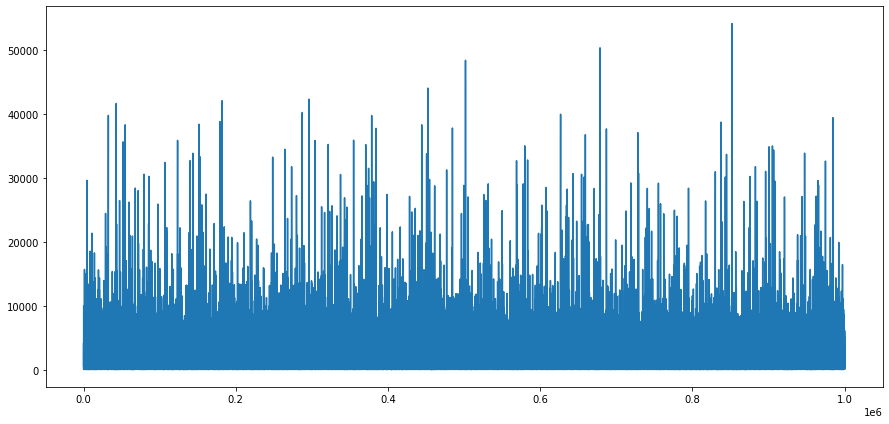

In [13]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(test.iloc[:, :-1])
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [14]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0          696.796921
1          746.263373
2          885.113060
3          906.555404
4          408.104922
             ...     
999995     444.996130
999996    6300.181423
999997     662.867126
999998     359.126618
999999    6011.064363
Length: 1000000, dtype: float64

In [15]:
distances_mean.describe()

count    1000000.000000
mean         694.087630
std          921.236007
min          154.372475
25%          333.631400
50%          465.399644
75%          727.526431
max        54122.750934
dtype: float64

In [16]:
threshold = 1000
outlier_index = np.where(distances_mean > threshold)
outlier_index

(array([     9,     25,     31, ..., 999980, 999996, 999999]),)

In [17]:
outlier_values = test.iloc[outlier_index]
outlier_values

,peak_amplitude,integral,phase_angle,cycle_number,rise_time,type
9,7.259907,18002,271,62975,69,pos
25,16.035548,22326,199,17506,3,neg
31,28.930653,81582,9,24333,0,pos
34,17.395105,-25438,42,40729,0,neg
36,27.180653,35765,8,36590,0,neg
...,...,...,...,...,...,...
999965,9.402681,10085,127,42170,2,neg
999968,20.132867,-12749,20,15697,388,neg
999980,7.638695,-10607,281,1405,0,neg
999996,17.898019,-71704,332,32752,0,neg
